## Case Study Report 1  

---

**Prepared By:** Abdullah Master  

**PRN:** 22070521001  
 
**Date:** 26 April 2025  

---



## SCENARIO
A startup is developing a mobile app that scans handwritten digits from receipts and recognizes them for automated expense logging. As a data scientist, you're tasked with building a deep learning model that can classify handwritten digits (0 to 9).
You're given the MNIST dataset, which contains 70,000 grayscale images (28x28 pixels) of handwritten digits. Your job is to create a model that can predict the correct digit from an input image.


## Approach

To solve this classification problem, a basic **feedforward neural network (Dense Neural Network)** is used. The MNIST dataset is simple and structured, making it ideal for dense layers. The images are first normalized and flattened before feeding them into the model.

The model architecture includes:
- An input layer to receive flattened 28x28 images.
- One hidden layer with ReLU activation for learning non-linear patterns.
- An output layer with 10 units (for digits 0-9) and softmax activation to produce class probabilities.

This design balances simplicity with sufficient learning capability for the MNIST dataset.


## Dataset Overview
The MNIST dataset contains:
- **60,000 training images** and **10,000 testing images**.
- Each image is a **28x28 grayscale** image of a handwritten digit.
- Labels correspond to digits from 0 to 9.


## Model Architecture Overview
The model is a **simple feedforward neural network** consisting of:
- An input layer of 784 neurons (flattened 28x28 image)
- One hidden dense layer with ReLU activation
- One output dense layer with softmax activation (10 neurons for 10 digit classes)


| Hyperparameter | Value |
|:---|:---|
| Optimizer | Adam |
| Loss Function | Categorical Crossentropy |
| Epochs | 10 |
| Batch Size | 32 |
| Learning Rate | Default (adaptive) |

---

## Step 1: Import the Libraries

We begin by importing the necessary libraries, such as TensorFlow, Keras, and NumPy.

In [81]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

## Step 2: Load and Preprocess the MNIST Dataset

Load the MNIST dataset directly from TensorFlow datasets. The data is divided into training and testing sets.

In [82]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


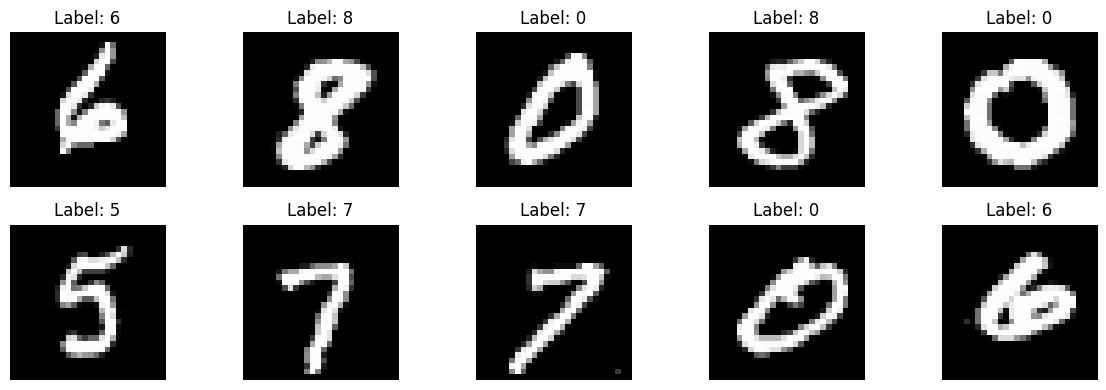

In [83]:
# Visualize 10 random images from the training set
random_indices = random.sample(range(X_train.shape[0]), 10)
plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    image = X_train[idx]
    label = y_train[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Step 3: Normalize the Images

The pixel values are normalized to the range [0, 1] by dividing by 255.0. Normalization helps the model train faster and achieve better performance.

In [84]:
# Preprocessing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Step 4: Reshape Images (Flattening)

Since dense layers expect 1D input, the 28x28 images are flattened into 784-dimensional vectors.

In [85]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

## Step 5: One-hot Encode the Labels

The labels (digits 0-9) are one-hot encoded to represent them in a categorical format suitable for multi-class classification.

In [86]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Step 6: Build the Feedforward Neural Network

A simple sequential model is built:
- A dense hidden layer with ReLU activation
- An output dense layer with softmax activation

In [87]:
# Build a better model
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(10, activation='softmax')
])

In [88]:
# Display model architecture summary
print('\nModel Architecture Summary:')
print('=' * 50)
model.summary()

# Calculate total parameters
trainable_params = sum([np.prod(w.shape) for w in model.trainable_weights])
non_trainable_params = sum([np.prod(w.shape) for w in model.non_trainable_weights])
total_params = trainable_params + non_trainable_params

print('\nParameter Statistics:')
print('-' * 30)
print(f'Total Parameters: {total_params:,}')
print(f'Trainable Parameters: {trainable_params:,}')
print(f'Non-trainable Parameters: {non_trainable_params:,}')


Model Architecture Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)


Parameter Statistics:
------------------------------
Total Parameters: 244,554
Trainable Parameters: 243,658
Non-trainable Parameters: 896


## Step 7: Compile the Model

The model is compiled using:
- **Optimizer**: Adam (adaptive learning rate optimization)
- **Loss function**: Categorical Crossentropy (for multi-class classification)
- **Metric**: Accuracy

In [89]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 0s - 2ms/step - accuracy: 0.1427 - loss: 2.3397

Test accuracy: 0.1427


## Step 8: Train the Model

The model is trained over several epochs using the training data. During training, the loss and accuracy metrics are monitored.

In [90]:

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,           # Increased epochs
                    batch_size=64,       # More stable batch size
                    validation_split=0.1,
                    verbose=2)

Epoch 1/50
844/844 - 4s - 4ms/step - accuracy: 0.8651 - loss: 0.4443 - val_accuracy: 0.9668 - val_loss: 0.1111
Epoch 2/50
844/844 - 2s - 3ms/step - accuracy: 0.9358 - loss: 0.2163 - val_accuracy: 0.9728 - val_loss: 0.0934
Epoch 3/50
844/844 - 2s - 3ms/step - accuracy: 0.9492 - loss: 0.1676 - val_accuracy: 0.9762 - val_loss: 0.0784
Epoch 4/50
844/844 - 3s - 3ms/step - accuracy: 0.9556 - loss: 0.1486 - val_accuracy: 0.9767 - val_loss: 0.0797
Epoch 5/50
844/844 - 3s - 3ms/step - accuracy: 0.9618 - loss: 0.1276 - val_accuracy: 0.9772 - val_loss: 0.0786
Epoch 6/50
844/844 - 2s - 3ms/step - accuracy: 0.9637 - loss: 0.1192 - val_accuracy: 0.9783 - val_loss: 0.0758
Epoch 7/50
844/844 - 2s - 3ms/step - accuracy: 0.9678 - loss: 0.1056 - val_accuracy: 0.9800 - val_loss: 0.0672
Epoch 8/50
844/844 - 2s - 3ms/step - accuracy: 0.9698 - loss: 0.0973 - val_accuracy: 0.9778 - val_loss: 0.0721
Epoch 9/50
844/844 - 2s - 3ms/step - accuracy: 0.9712 - loss: 0.0948 - val_accuracy: 0.9820 - val_loss: 0.0667
E

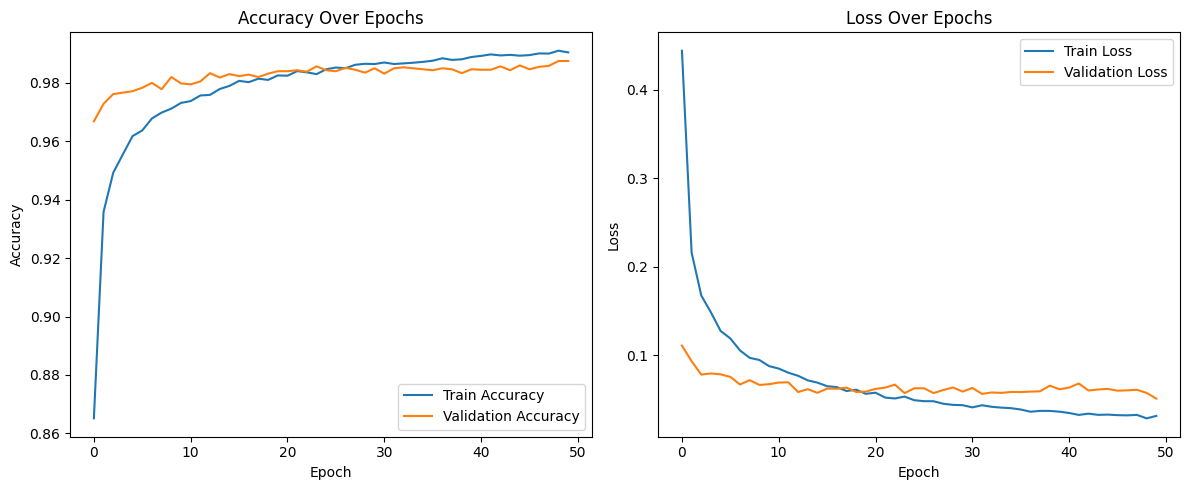

In [91]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Step 9: Evaluate the Model

After training, the model is evaluated on the unseen test data to measure its generalization performance.

313/313 - 0s - 1ms/step - accuracy: 0.9867 - loss: 0.0487

Test Accuracy: 0.9867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


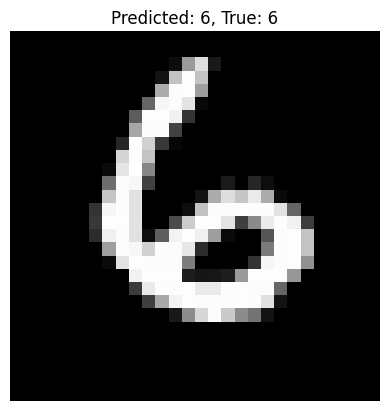

In [92]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predict a random image from the test set
index = random.randint(0, X_test.shape[0] - 1)
image = X_test[index]
true_label = np.argmax(y_test[index])

image_reshaped = image.reshape(1, 784)

predicted_probs = model.predict(image_reshaped)
predicted_label = np.argmax(predicted_probs)

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()


## How to Improve the Model

To achieve even better accuracy, the following strategies can be considered:
- **Add more layers**: Introducing additional dense layers to learn more complex patterns.
- **Increase neurons**: Using a larger number of neurons in hidden layers.
- **Use Convolutional Neural Networks (CNNs)**: CNNs are more suitable for image data compared to simple dense networks.
- **Data Augmentation**: Artificially expanding the dataset by rotating, scaling, and flipping images.
- **Regularization Techniques**: Adding dropout layers to prevent overfitting.
- **Hyperparameter Tuning**: Adjusting learning rate, batch size, and number of epochs.

These strategies would likely improve the model's robustness and overall accuracy.


## Conclusion

A basic feedforward neural network was successfully built to classify handwritten digits using the MNIST dataset. The model achieved reasonable accuracy by following simple preprocessing and training steps.

Although this basic model performs decently, further improvements using CNNs and data augmentation techniques can lead to much higher accuracy suitable for real-world mobile app deployment.

This case study demonstrates the end-to-end development of a deep learning classification system, including preprocessing, modeling, training, evaluation, and improvement considerations.
